# Project: Investigate a Dataset - No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

For this project, I will be using the No Show Appointments dataset. This dataset contains information about some 100,000 medical appointment schedules across different hospitals in Brazil and whether the patient showed up for said appointment. The dataset contains the following columns:
- **PatientId** - the Patients's ID number
- **AppointmentId** - the appointment ID number
- **Gender** - the patient's gender
- **ScheduleDay** - what day the patient scheduled the appointment
- **AppointmentDay** - the expected day for the appointment
- **Neighbourhood** - the location of the hospital
- **Scholarship** - indicates whether the patient is enrolled in the Brasilian welfare program Bolsa Família as 0s (for those not enrolled) and 1s (enrolled patients)
- **Hipertension, Diabetes, Alcoholism and Handicap**  - These columns indicate the presence of any of these conditions as 0s and 1s
- **SMS_received** - indicates receipt of SMS notification
- **No-show** - indicates whether the patient missed their appointment. *Yes* means they missed the appointment and *No* means they showed up. 


### Question(s) for Analysis
For this project I will be looking at investigating the following:
1. Ratio of no shows to show ups: Are there more cases of no shows against show ups?
2. Which location accounts for the most no shows?
3. Determine if any of the following factors influence patients missing their appointment:
    - Gender; Is the gender of the patient likely to influence them showing up for the appointment?
    - Scholarship; Are the welfare recipients more likely to show up for their appointments?


In [70]:
#import relevant packages for this project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
# Upgrade pandas to use dataframe.explode() function. 
# method not needed for my analysis
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [72]:
# Load the no show appointments dataset
# datafile was renamed before loading
df = pd.read_csv('noshowappointments.csv')
# output the first five rows to confirm data is loaded
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [73]:
#check shape of data file
df.shape

(110527, 14)

This dataset has 14 columns and 110527 rows of data.


### Data Cleaning
As part of cleaning the data I will check for the below using the info method:

- null values
- datatypes of the various columns
- column naming errors

The duplicated method will be used to check for duplicate values and the describe function to check for any negative values or other relevant errors to look out for
 

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no null values in this dataset. 

The PatientId column is however a float, and will be changed to an integer value in a subsequent cell since it is an Id number.

The ScheduledDay and AppointmentDay columns will also be converted to datetime columns.

The 'Handcap' and 'Hipertension' columns will be renamed because they are incorrectly spelt. The No-show column will be renamed for consistency and ease of use.

In [75]:
#checking for number of duplicate values
sum(df.duplicated())

0

In [76]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


There are no duplicate values in this dataset.

From the describe method however, the minimum age is a negative value which will be rectified.

#### Rectifying issues observed

In [77]:
# Convert PatientId to an integer
# int64 is specified to prevent Id number from being cut off
df['PatientId'] =df['PatientId'].astype('int64')

#Convert SceduledDay and AppointmentDay to datetime columns
df['ScheduledDay'] =pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] =pd.to_datetime(df['AppointmentDay'])

In [78]:
#Change column names
NewNames = {'Hipertension':'Hypertension','Handcap':'Handicap','No-show':'NoShow'}
df= df.rename(columns = NewNames)

In [79]:
#Convert age column to positive values only
df['Age'] = df['Age'].abs()

In [80]:
#run info method to check that the columns have been renamed 
#and datatypes changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
NoShow            110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


In [81]:
#Check that the age column has no negative values
df['Age'].describe()

count    110527.000000
mean         37.088892
std          23.110176
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

Since the purpose of the SMS_received column is unclear, we will drop the column

In [82]:
#delete SMS_received column
del df['SMS_received']
#confirm that the column has been deleted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
NoShow            110527 non-null object
dtypes: datetime64[ns](2), int64(8), object(3)
memory usage: 11.0+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### Are there more cases of no shows against show ups?

In [83]:
#Display value counts of the noshow column
CntOfNoShowVal = df['NoShow'].value_counts()
print(CntOfNoShowVal)

No     88208
Yes    22319
Name: NoShow, dtype: int64


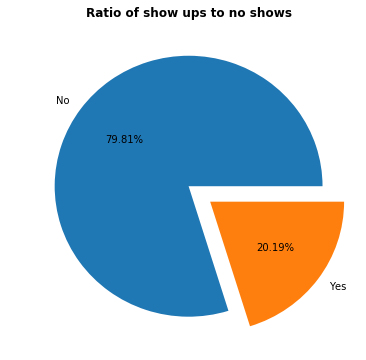

In [84]:
#Use the plot function to create a pie chart
#The label attribute is to remove the default label appended to the chart
#The explode attribute is used to separate the sections from each other
#autopct was used to show the percentage values to 2 decimal places
chart = CntOfNoShowVal.plot(kind = 'pie', figsize = (6,6),label=' ', explode=[0,0.2], autopct='%1.2f%%');

#Add a title
chart.set_title("Ratio of show ups to no shows", weight='bold');

As mentioned earlier under the description of the No Show column, Yes accounts for the number of patients who didn't show up for their appointment and No for those who showed up. 

From the above pie chart we see that number of no shows accounts for 20.19% of the appointments booked.

### Which location accounts for the most No Shows?

In [85]:
#create a dataframe for appointments where patient did not show up
df_missed = df.query('NoShow =="Yes"')

In [86]:
#Total number of distinct hospital locations
df['Neighbourhood'].nunique()

81

In [87]:
#How many unique hospital locations are expected for missd appointments
df_missed['Neighbourhood'].nunique()

80

In [88]:
#Count the number of occurrences of each neighbourhood value in the no show dataframe df_noshow 
#Since I am only interested in the neighbourhood that accounts for the most no shows 
#I will limit the data to the highest 10 values
NoOfOccurrences = df_missed.groupby('Neighbourhood')['NoShow'].count().nlargest(10)

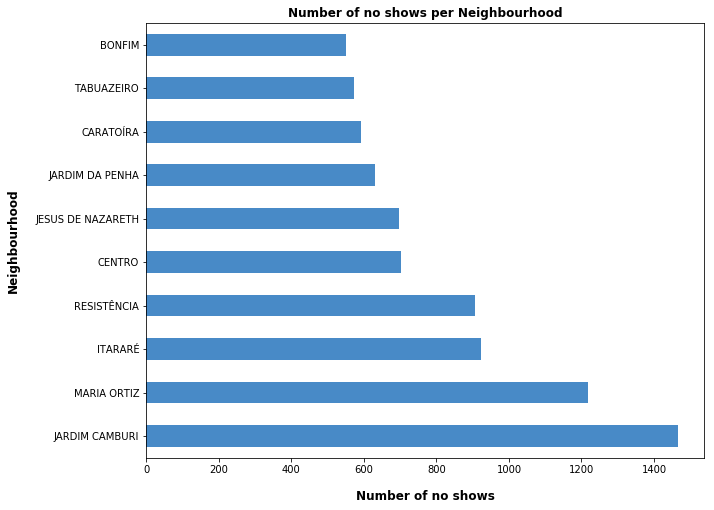

In [89]:
#plot horizontal bar chart showing number of no shows per neigbourhood 
NoOfOccurrences.plot(kind='barh', figsize =(10,8), color="#488AC7");
plt.title("Number of no shows per Neighbourhood",weight ='bold')
plt.xlabel("Number of no shows", labelpad=15, weight='bold',size=12)
plt.ylabel("Neighbourhood",labelpad=15, weight='bold',size=12);

With 80 distinct hospital locations, I decided to limit the horizontal bar chart to just the 10 highest values, especially since I am only interested in the neighbourhood that accounts for the most no shows.

### Determine if the Gender, Scholarship status, Age and Patient's condition have any influence on showing up to their appointment

#### Gender

In [90]:
#Compare number of females against males who booked an appointment
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

There are over double the number of female patients as males. Now let's check the attendance of these two groups to their appointments.

In [91]:
# Table containing info on only missed appointment i.e. df_noshow was created earlier
# Count the NoShow column values and group by gender
df_gender_missed = df_missed.groupby('Gender')['NoShow'].count()

In [92]:
# Filter table for only instances where patient showed up
df_showedup = df.query('NoShow =="No"')

#Count the NoShow column and group by gender
df_gender_showedup = df_showedup.groupby('Gender')['NoShow'].count()

In [93]:
#To plot the grouped bar chart
# define the width of the bars
wth = 0.3

#define the distinct gender labels
gender =['Female', 'Male']

In [94]:
#Define position of the bars
bar1_psn=np.arange(len(gender))
bar2_psn=[i+wth for i in bar1_psn]

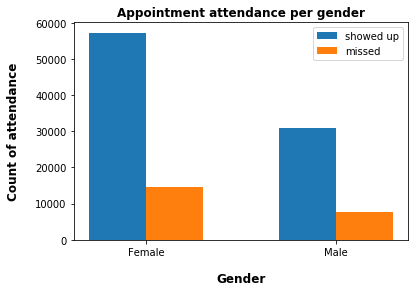

In [95]:
#plot the bar charts
plt.bar(bar1_psn,df_gender_showedup,wth,label="showed up");
plt.bar(bar2_psn,df_gender_missed,wth,label="missed");

#change the x-axis label to the gender values and position it at the center
plt.xticks(bar1_psn+wth/2,gender)

#show the legend
plt.legend();

#add axis labels and title
plt.title("Appointment attendance per gender",weight ='bold')
plt.xlabel("Gender", labelpad=15, weight='bold',size=12)
plt.ylabel("Count of attendance",labelpad=15, weight='bold',size=12);

Though the number of female patients is relatively higher than the number of male patients, we notice that both groups have more cases of attended appointments as opposed to missed appointments.

#### Scholarship Status

Check if patients with no scholarship miss their appointments more

In [96]:
#Check number of patients enrolled in the Bolsa Familia scholarship
print (df['Scholarship'].value_counts())

0    99666
1    10861
Name: Scholarship, dtype: int64


In [97]:
#Check number of scholarship receipients who missed their appointments
print (df_missed['Scholarship'].value_counts())

0    19741
1     2578
Name: Scholarship, dtype: int64


Out of the 10681 scholarship reciepients, 2578 of them missed their appointments.

In [98]:
#Count number of missed appointments and group by scholarship status
df_sch_missed =df_missed.groupby('Scholarship')['NoShow'].count()

#Count number of appointments attended and group by scholarship status
df_sch_attend = df_showedup.groupby('Scholarship')['NoShow'].count()

#define the scholarship status labels
sch_values=['Not Enrolled', 'Enrolled']
#plt.bar(sch_values,df_sch_missed, wth);

Now let's compare attendance of scholarship recipients to non-recipients

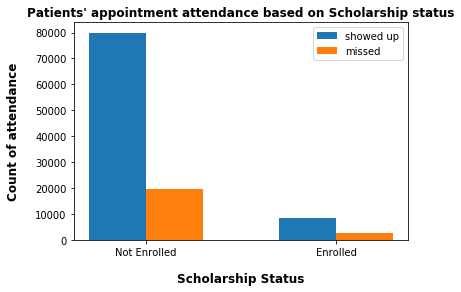

In [99]:
#Define position of the bars
bar1_psn=np.arange(len(sch_values))
bar2_psn=[i+wth for i in bar1_psn]

#plot the bar charts
plt.bar(bar1_psn,df_sch_attend,wth,label="showed up");
plt.bar(bar2_psn,df_sch_missed,wth,label="missed");

#change the x-axis label to the scholarship status values and position it at the center
plt.xticks(bar1_psn+wth/2,sch_values)

#show the legend
plt.legend();

#add axis labels and title
plt.title("Patients' appointment attendance based on Scholarship status",weight ='bold')
plt.xlabel("Scholarship Status", labelpad=15, weight='bold',size=12)
plt.ylabel("Count of attendance",labelpad=15, weight='bold',size=12);

<a id='conclusions'></a>
## Conclusions

- From the EDA conducted, there are relatively less appointments missed. Of the 110527 appointments scheduled, 22319 were missed; which accounts for 20.19% of the appointments scheduled.

- Of the over 22000 missed appointments, Jardin Camburi accounts for about 1500 of them. Other neighbourhoods such as Maria Ortiz, Itarare, Resistencia, Cemtro, etc also account for the highest numbers of these missed appointments.

 - Out of 81 distinct locations, 80 of them have recorded instances of missed appointments. Unfortunately, there isn't additional data such as the ease of accessing the hospital, service delivery rating, etc to ascertain if missing appointments is influenced by the hospital service or the patient's ease of accessing the hospital.

- I also noticed that majority of the patients are females, however both males and females fairly miss and attend appointments. As such it is not easy to conclude if the gender of the patient has any influence of them showing up for the appointment.

- Also, with the availability of the Bolsa Familia welfare program, I noticed that majority of the patients are not enrolled. Unfortunately there isn't enough information to determine why there are few enrolled on the program or if there are any special criteria for it. I noticed, however, that enrolment in the scholarship doesn't have much of an impact on attendance either. In fact of the may patients not enrolled in the program, majority of them attend their appointments.

In [100]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0